# Regression
## General
Regression is a type of supervised Machine Learning algorithms that has a continous output. There are different kind of regression algorithms such as **Linear Regression**, **Ridge Regression**, **Decision Trees**, **Support Vector Regression** and many more. Some of those can be used in a similar fashion for classification as well with some differences in the process. 

## Algorithms
A collection of regression algorithms and how they can be implemented with Python and relevant libraries.

### Linear Regression
Linear regression is probably the most common Regression algorithm, for its simplicity and for being one of the first algorithms introduced to ML-learners. 

On the most basic level, you Linear Regression to find a function as a first degree polynomial with the notation: $h_\theta(x) = \theta_1x + \theta_0$ where $\theta$ is the parameters that will be set by a process called "Gradient Descent". The data that the algorithm uses is exactly for this, to find the values of $\theta$ that fits the observations as close as possible.

It does this through a so called "Cost Function", *which has it's own page in the directory* and the goal here is to minimise the Cost Function using "Gradient Descent". The cost function for Linear Regression is usually defined as: 

### $ E(\theta) = \frac{1}{n}\times\displaystyle\sum_{i=1} ^n [h_\theta(x_i) - y_i]^2$

Which calculates the Euclidean distance between every observation, the predicted output $h_\theta(x_i)$ & the true output $y_i$ and sums it and takes the mean, where the higher distance signifies a higher cost/error. The distance between every datapoint, is what we want to minimise as much as possible simultaneously. Of course there are never one perfect line, but the algorithm will find the one closest to perfect.   

A good beginner problem for Linear Regression is predicting house prices and that's what's gonna be showcased below.

0.8599339651245674
0.8253948072168067
The house will cost: 334766.0 $


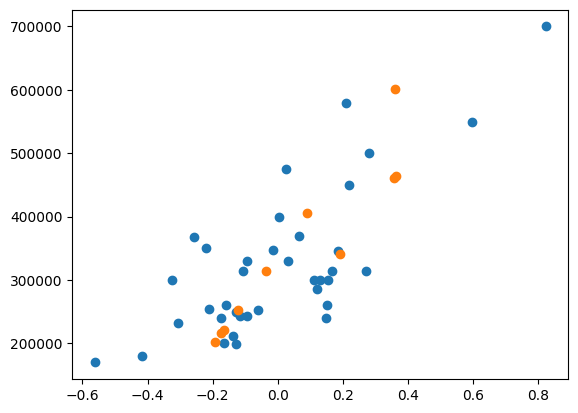

In [1]:
import pandas as pd
import matplotlib.pylab as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.decomposition import PCA

#(47, 3), 47 observations with 2 features (size, rooms) and 1 output (price).
df = pd.read_csv("datasets/housing-dataset.csv") 

#Extracting the independent and dependent variables
X = df[["size", "rooms"]].values
y = df["price"].values

#As there is a very large difference between the independent features, we need to scale them.
#There is a page available to understand this process in the directory.
scaler = MinMaxScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

#Split the train data and test data so we can test the accuracy later
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

#Train the model, this will find the theta parameters for the h(x) line
model = LinearRegression()
model.fit(X_train, y_train)

#Predict using the train & test data, this is only for demonstration purpose, 
#obviously you don't use the train data for prediction in a real scenario as that would be pretty useless.
prediction_training = model.predict(X_train)
prediction_test = model.predict(X_test)

#Accuracy score, for both predictions and as expected, the training prediction is higher than the test. 
accuracy_training = 1 - mean_absolute_percentage_error(y_train, prediction_training)
accuracy_test = 1 - mean_absolute_percentage_error(y_test, prediction_test)
print(accuracy_training) #86%
print(accuracy_test) #82.5%


#For a general prediction, let's see what a house with 4 rooms and 2123 square feets should cost...
X_example = scaler.transform([[2123, 4]])
print("The house will cost:", model.predict(X_example)[0]//1, '$')


#Lets plot the result, in this case, I want to plot this in 2d, 
# XY but we have 3 variables in total, so we need to use 
# something called PCA which is a dimension reducing technique

pca = PCA(n_components=1)
pca.fit(X_train)
X_train_reduced = pca.transform(X_train)
X_test_reduced = pca.transform(X_test)

plt.scatter(X_train_reduced, y_train) #Train
plt.scatter(X_test_reduced, prediction_test) #Predictions

